In [18]:
import csv
import os
from pathlib import Path
import re
import matplotlib.pyplot as plt
import numpy as np

In [19]:
############## ARQUIVO INCOMPLETO - A FINALIZAR

# recupera o caminho completo do diretório de dados de resultado
dir_dados_resultados = str(Path(os.getcwd()).parents[0]) + '\data\output'

# Apresenta o número de sprints gerador por cada cenário
sprint_por_cenario = {}

# percorre cada arquivo presente no diretório de dados de entrada
for arquivo_resultado in Path(dir_dados_resultados).iterdir():

    if not (arquivo_resultado.is_file() and arquivo_resultado.suffix == '.csv'):
        continue

    algoritmo = 'MIP' if str(arquivo_resultado).find('MIP') != -1 else 'CPSAT'

    try:
        qtd_requisitos = re.search('req-(.+?)\\.csv', str(arquivo_resultado)).group(1)
    except AttributeError:
        qtd_requisitos = ''

    print(algoritmo, '-', qtd_requisitos, ':', arquivo_resultado)

    # lista que armazenará os dados de cada arquivo
    resultados = {}
    valores = []
    pesos = []

    # Inicializa a quantidade de sprints por cenário a cada novo cenário
    if sprint_por_cenario.get(qtd_requisitos) is None:
        sprint_por_cenario[qtd_requisitos] = {'MIP': [], 'CPSAT': []}

    if arquivo_resultado.is_file() and arquivo_resultado.suffix == '.csv':
        # faz a leitura do CSV
        with open(arquivo_resultado, newline='') as csvfile:
            leitor = csv.DictReader(csvfile)
            valor_capacidade = {}

            for linha in leitor:

                # sprint,requisito,valor_req,peso_req
                sprint = linha['sprint']
                valor = float(linha['valor_req'])
                peso = float(linha['peso_req'])
                valor_capacidade = resultados.get(sprint)

                # primeira vez da análise da sprint, cria a chave e insere o valor (valor e peso do requisito)
                if valor_capacidade is None:
                    valor_capacidade = {'valor': 0, 'capacidade': 0}
                    sprint_por_cenario[qtd_requisitos][algoritmo].append({sprint: valor_capacidade})

                valor_capacidade['valor'] += float(linha['valor_req'])
                valor_capacidade['capacidade'] += float(linha['peso_req'])
                resultados[sprint] = valor_capacidade


# print('**', sprint_por_cenario[qtd_requisitos])
# print('**', len(sprint_por_cenario[qtd_requisitos][algoritmo]))
# print(resultados)
# print(sprint_por_cenario)
# sprint_por_cenario[qtd_requisitos][algoritmo] = len(sprint_por_cenario[qtd_requisitos][algoritmo])
# print("Sprints por cenário: ", sprint_por_cenario)
# imprime_resultados_csv(algoritmo, qtd_requisitos, resultados)

CPSAT - 10 : C:\Users\91924456168\OneDrive - unb.br\Mestrado\ppca 2022\AED\workspace\ppca-aed\data\output\resultado-CPSAT-req-10.csv
CPSAT - 100 : C:\Users\91924456168\OneDrive - unb.br\Mestrado\ppca 2022\AED\workspace\ppca-aed\data\output\resultado-CPSAT-req-100.csv
CPSAT - 200 : C:\Users\91924456168\OneDrive - unb.br\Mestrado\ppca 2022\AED\workspace\ppca-aed\data\output\resultado-CPSAT-req-200.csv
CPSAT - 30 : C:\Users\91924456168\OneDrive - unb.br\Mestrado\ppca 2022\AED\workspace\ppca-aed\data\output\resultado-CPSAT-req-30.csv
CPSAT - 300 : C:\Users\91924456168\OneDrive - unb.br\Mestrado\ppca 2022\AED\workspace\ppca-aed\data\output\resultado-CPSAT-req-300.csv
CPSAT - 400 : C:\Users\91924456168\OneDrive - unb.br\Mestrado\ppca 2022\AED\workspace\ppca-aed\data\output\resultado-CPSAT-req-400.csv
CPSAT - 50 : C:\Users\91924456168\OneDrive - unb.br\Mestrado\ppca 2022\AED\workspace\ppca-aed\data\output\resultado-CPSAT-req-50.csv
CPSAT - 70 : C:\Users\91924456168\OneDrive - unb.br\Mestrado\

# Sprint por cenário

[10, 30, 50, 70, 100, 200, 300, 400]
[2, 4, 8, 9, 15, 28, 40, 55]
[2, 4, 8, 9, 15, 28, 40, 55]


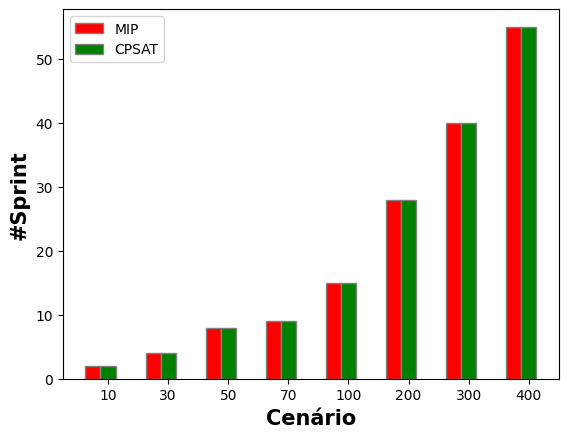

In [23]:

barra_mip = []
barra_cpsat = []

# set width of bars
barWidth = 0.25

chaves = sprint_por_cenario.keys()
list1 = [int(x) for x in chaves]
list1.sort()
print(list1)
for cenario in list1:
    barra_mip.append(len(sprint_por_cenario[str(cenario)]['MIP']))
    barra_cpsat.append(len(sprint_por_cenario[str(cenario)]['CPSAT']))
print(barra_mip)
print(barra_cpsat)

# Set position of bar on X axis
br1 = np.arange(len(barra_mip))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, barra_mip, color='r', width=barWidth, edgecolor='grey', label='MIP')
plt.bar(br2, barra_cpsat, color='g', width=barWidth, edgecolor='grey', label='CPSAT')

# Adding Xticks
plt.xlabel('Cenário', fontweight='bold', fontsize=15)
plt.ylabel('#Sprint', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(list1))], list1)

plt.legend()
plt.show()

# Valor e capacidade por cenário

[10, 30, 50, 70, 100, 200, 300, 400]
Valor MIP:  [91.0, 33.0]
Valor CPSAT:  [32.0, 92.0]


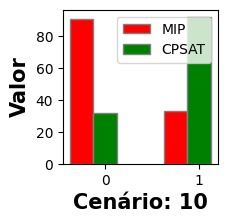

Capacidade MIP:  [179.0, 84.0]
Capacidade CPSAT:  [86.0, 177.0]


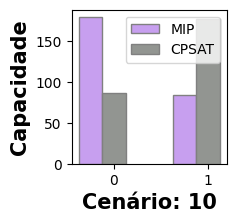

Valor MIP:  [70.0, 84.0, 88.0, 55.0]
Valor CPSAT:  [39.0, 85.0, 86.0, 87.0]


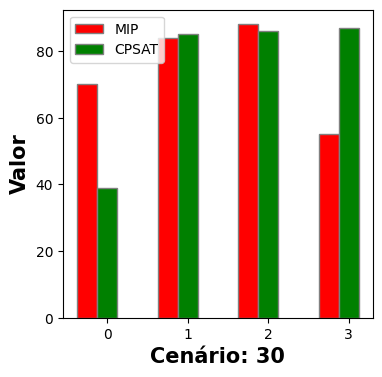

Capacidade MIP:  [180.0, 173.0, 175.0, 115.0]
Capacidade CPSAT:  [110.0, 179.0, 176.0, 178.0]


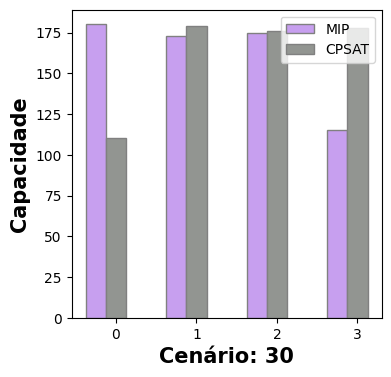

Valor MIP:  [91.0, 84.0, 79.0, 100.0, 65.0, 46.0, 59.0, 13.0]
Valor CPSAT:  [55.0, 68.0, 71.0, 70.0, 86.0, 42.0, 70.0, 75.0]


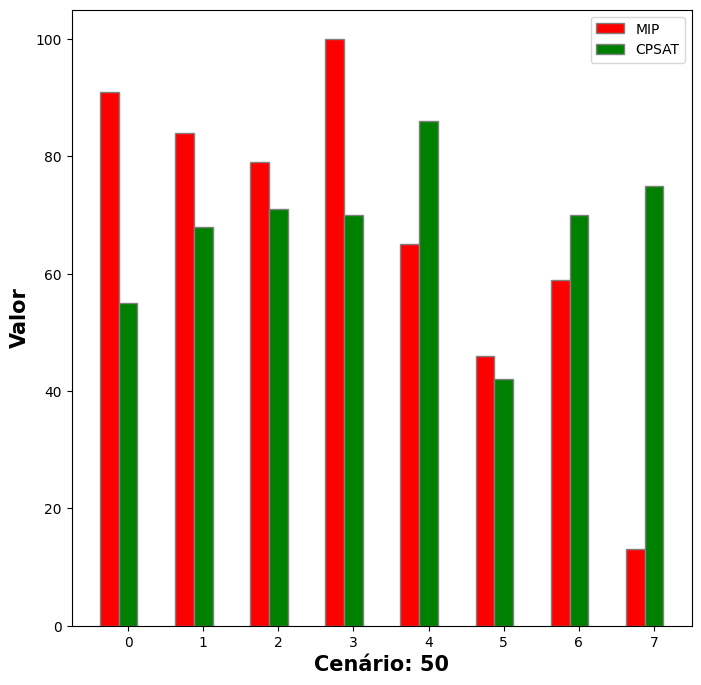

Capacidade MIP:  [172.0, 174.0, 180.0, 176.0, 180.0, 176.0, 180.0, 61.0]
Capacidade CPSAT:  [117.0, 131.0, 175.0, 171.0, 178.0, 171.0, 177.0, 179.0]


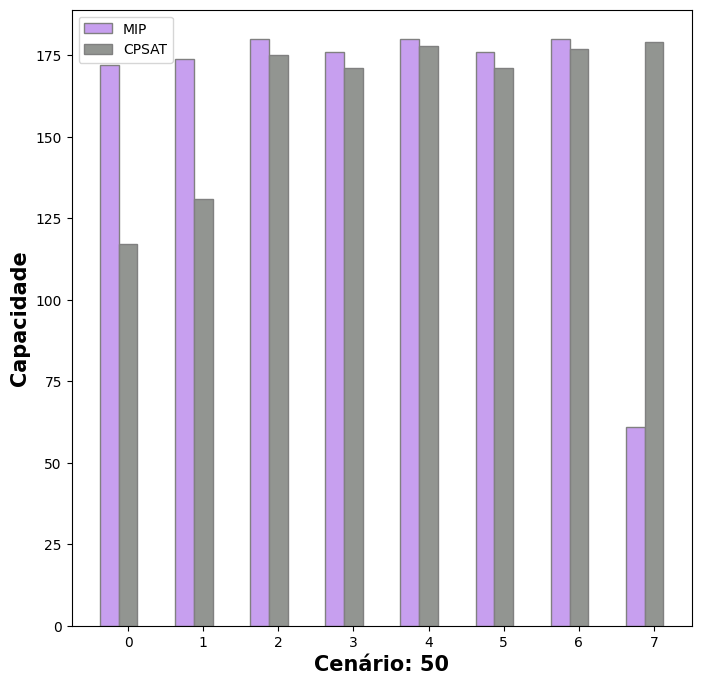

Valor MIP:  [81.0, 103.0, 69.0, 63.0, 75.0, 97.0, 73.0, 41.0, 52.0]
Valor CPSAT:  [74.0, 78.0, 60.0, 87.0, 93.0, 67.0, 78.0, 60.0, 57.0]


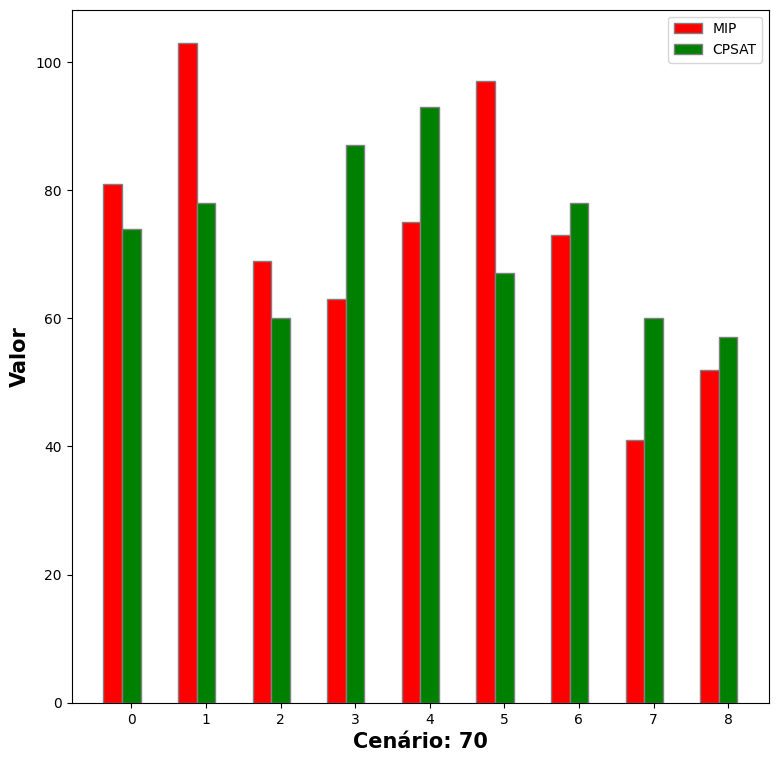

Capacidade MIP:  [180.0, 180.0, 173.0, 179.0, 176.0, 177.0, 174.0, 178.0, 160.0]
Capacidade CPSAT:  [172.0, 172.0, 173.0, 176.0, 177.0, 175.0, 177.0, 179.0, 176.0]


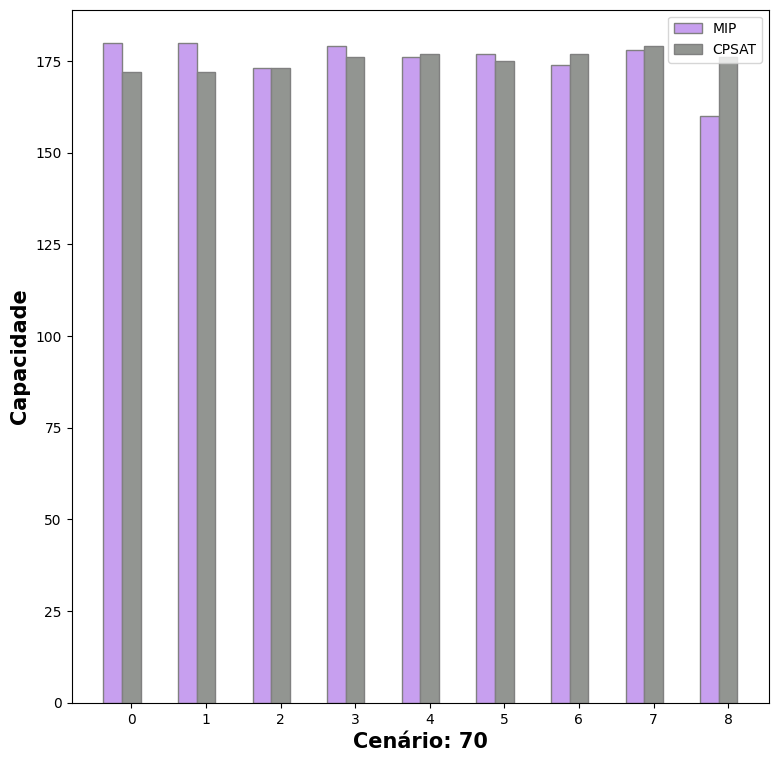

Valor MIP:  [56.0, 46.0, 68.0, 72.0, 64.0, 48.0, 76.0, 53.0, 46.0, 72.0, 84.0, 111.0, 59.0, 78.0, 26.0]
Valor CPSAT:  [23.0, 46.0, 59.0, 71.0, 43.0, 62.0, 73.0, 56.0, 28.0, 78.0, 78.0, 102.0, 107.0, 57.0, 76.0]


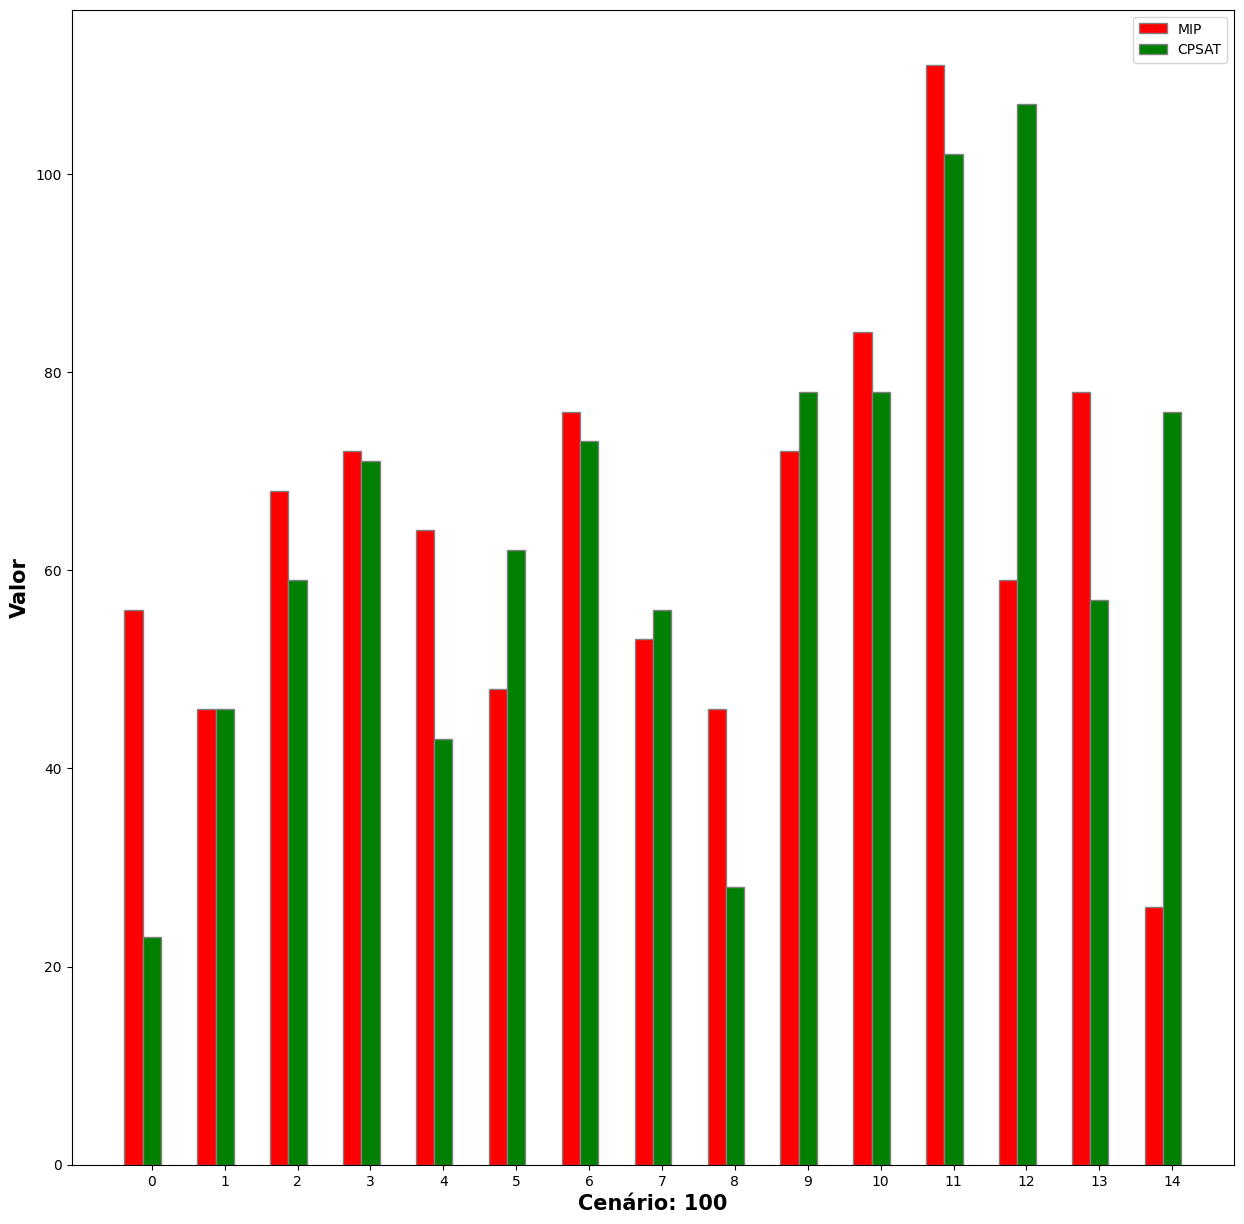

Capacidade MIP:  [180.0, 180.0, 179.0, 178.0, 180.0, 176.0, 175.0, 176.0, 172.0, 178.0, 180.0, 180.0, 170.0, 176.0, 62.0]
Capacidade CPSAT:  [73.0, 173.0, 177.0, 166.0, 179.0, 180.0, 179.0, 180.0, 175.0, 173.0, 173.0, 179.0, 179.0, 176.0, 180.0]


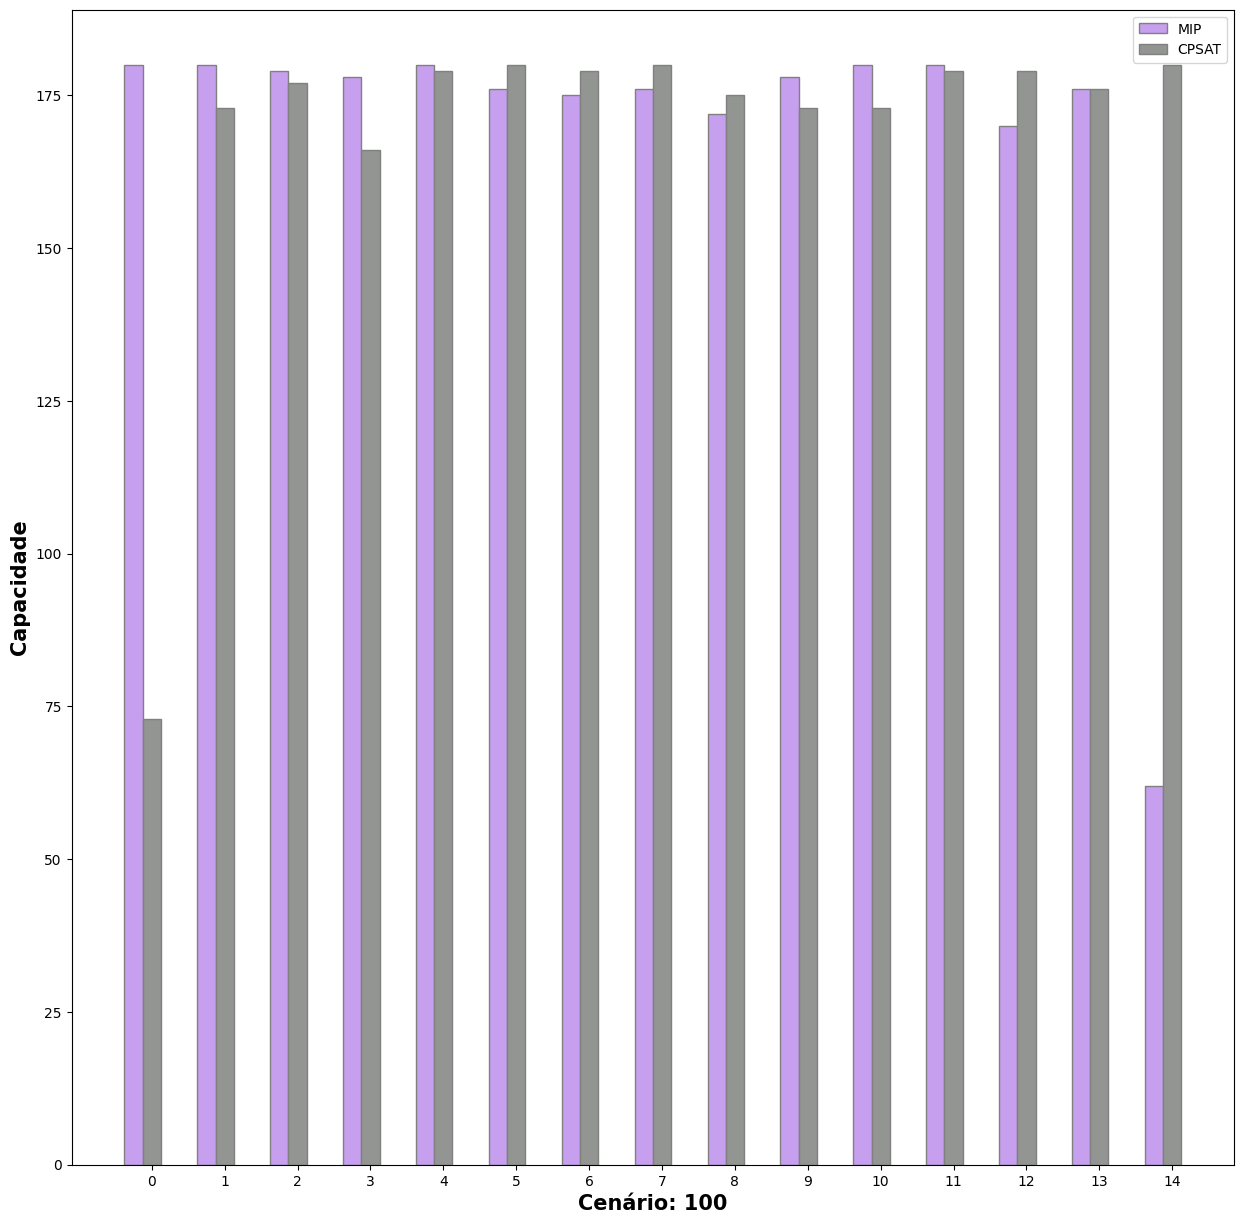

Valor MIP:  [77.0, 83.0, 88.0, 74.0, 70.0, 65.0, 68.0, 76.0, 55.0, 64.0, 84.0, 45.0, 85.0, 68.0, 56.0, 40.0, 66.0, 91.0, 78.0, 53.0, 72.0, 42.0, 81.0, 84.0, 83.0, 57.0, 51.0, 34.0]
Valor CPSAT:  [39.0, 69.0, 107.0, 74.0, 57.0, 68.0, 63.0, 62.0, 62.0, 68.0, 74.0, 71.0, 56.0, 72.0, 89.0, 31.0, 42.0, 93.0, 70.0, 58.0, 71.0, 69.0, 46.0, 106.0, 76.0, 68.0, 54.0, 75.0]


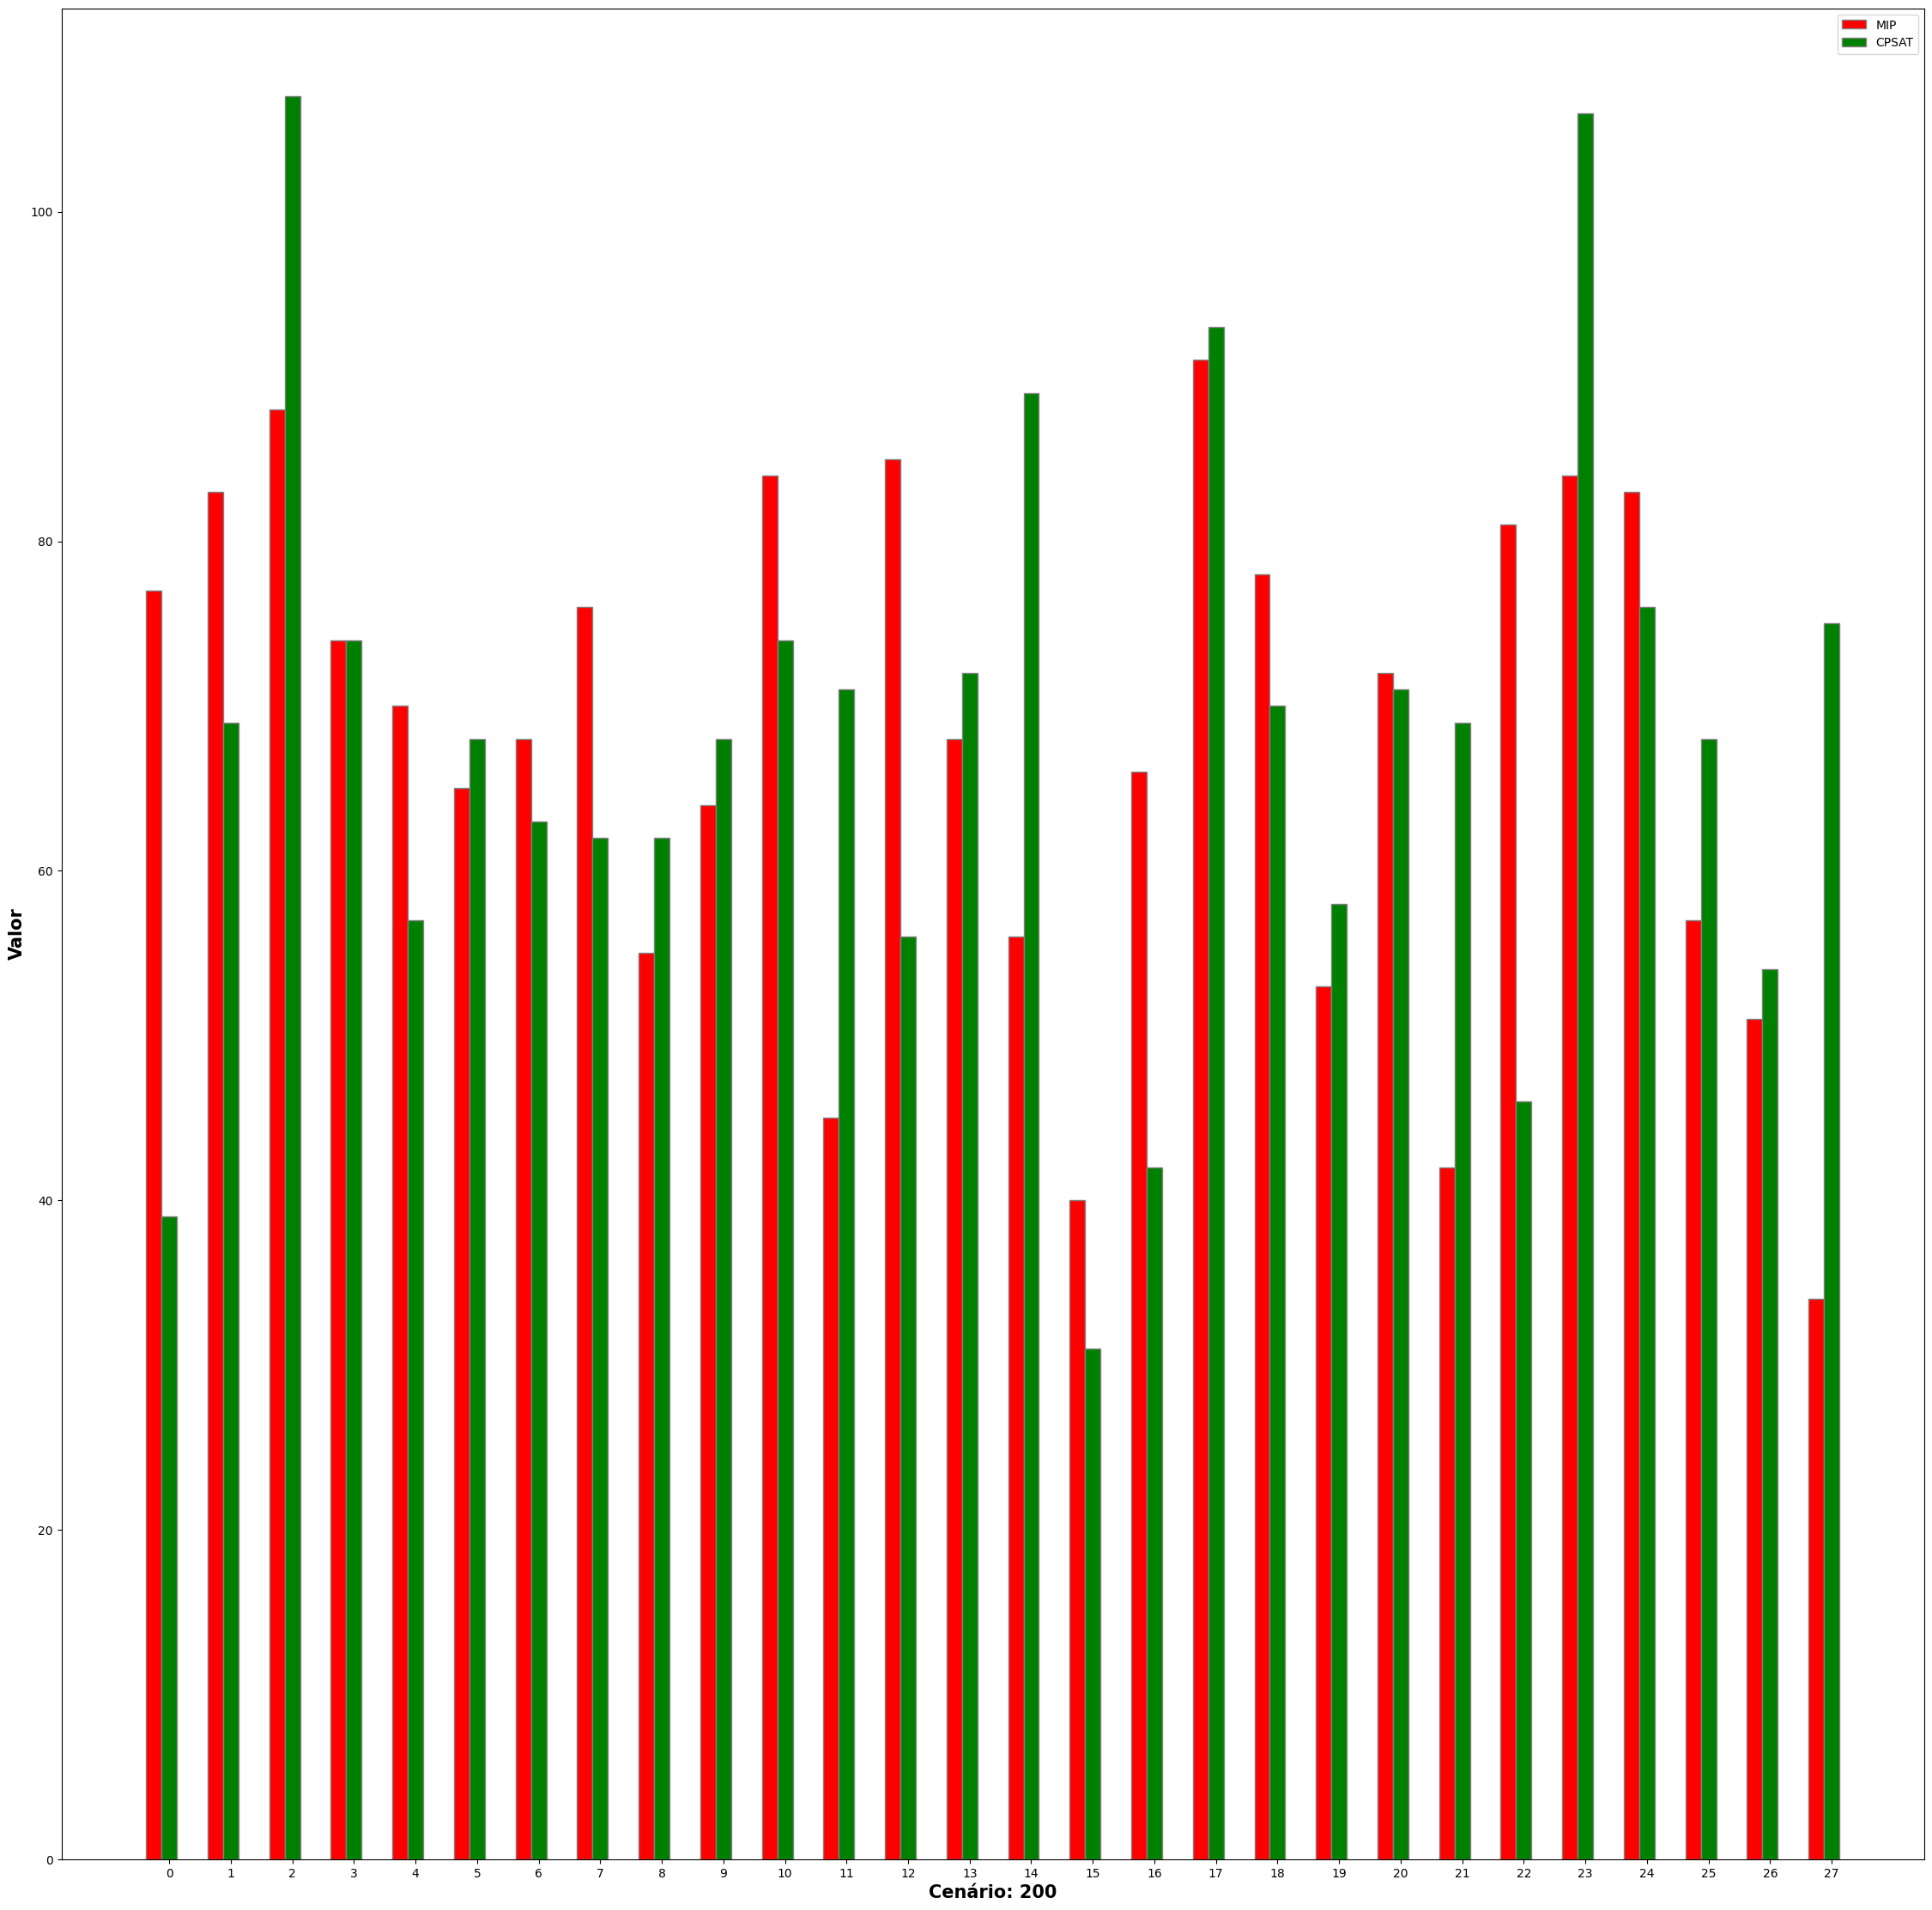

Capacidade MIP:  [180.0, 180.0, 178.0, 179.0, 177.0, 176.0, 173.0, 180.0, 180.0, 179.0, 178.0, 176.0, 180.0, 179.0, 180.0, 179.0, 180.0, 175.0, 180.0, 177.0, 179.0, 180.0, 180.0, 174.0, 174.0, 170.0, 172.0, 90.0]
Capacidade CPSAT:  [98.0, 171.0, 179.0, 171.0, 180.0, 180.0, 176.0, 177.0, 180.0, 177.0, 172.0, 179.0, 172.0, 180.0, 174.0, 180.0, 180.0, 180.0, 180.0, 179.0, 174.0, 179.0, 175.0, 179.0, 177.0, 178.0, 180.0, 178.0]


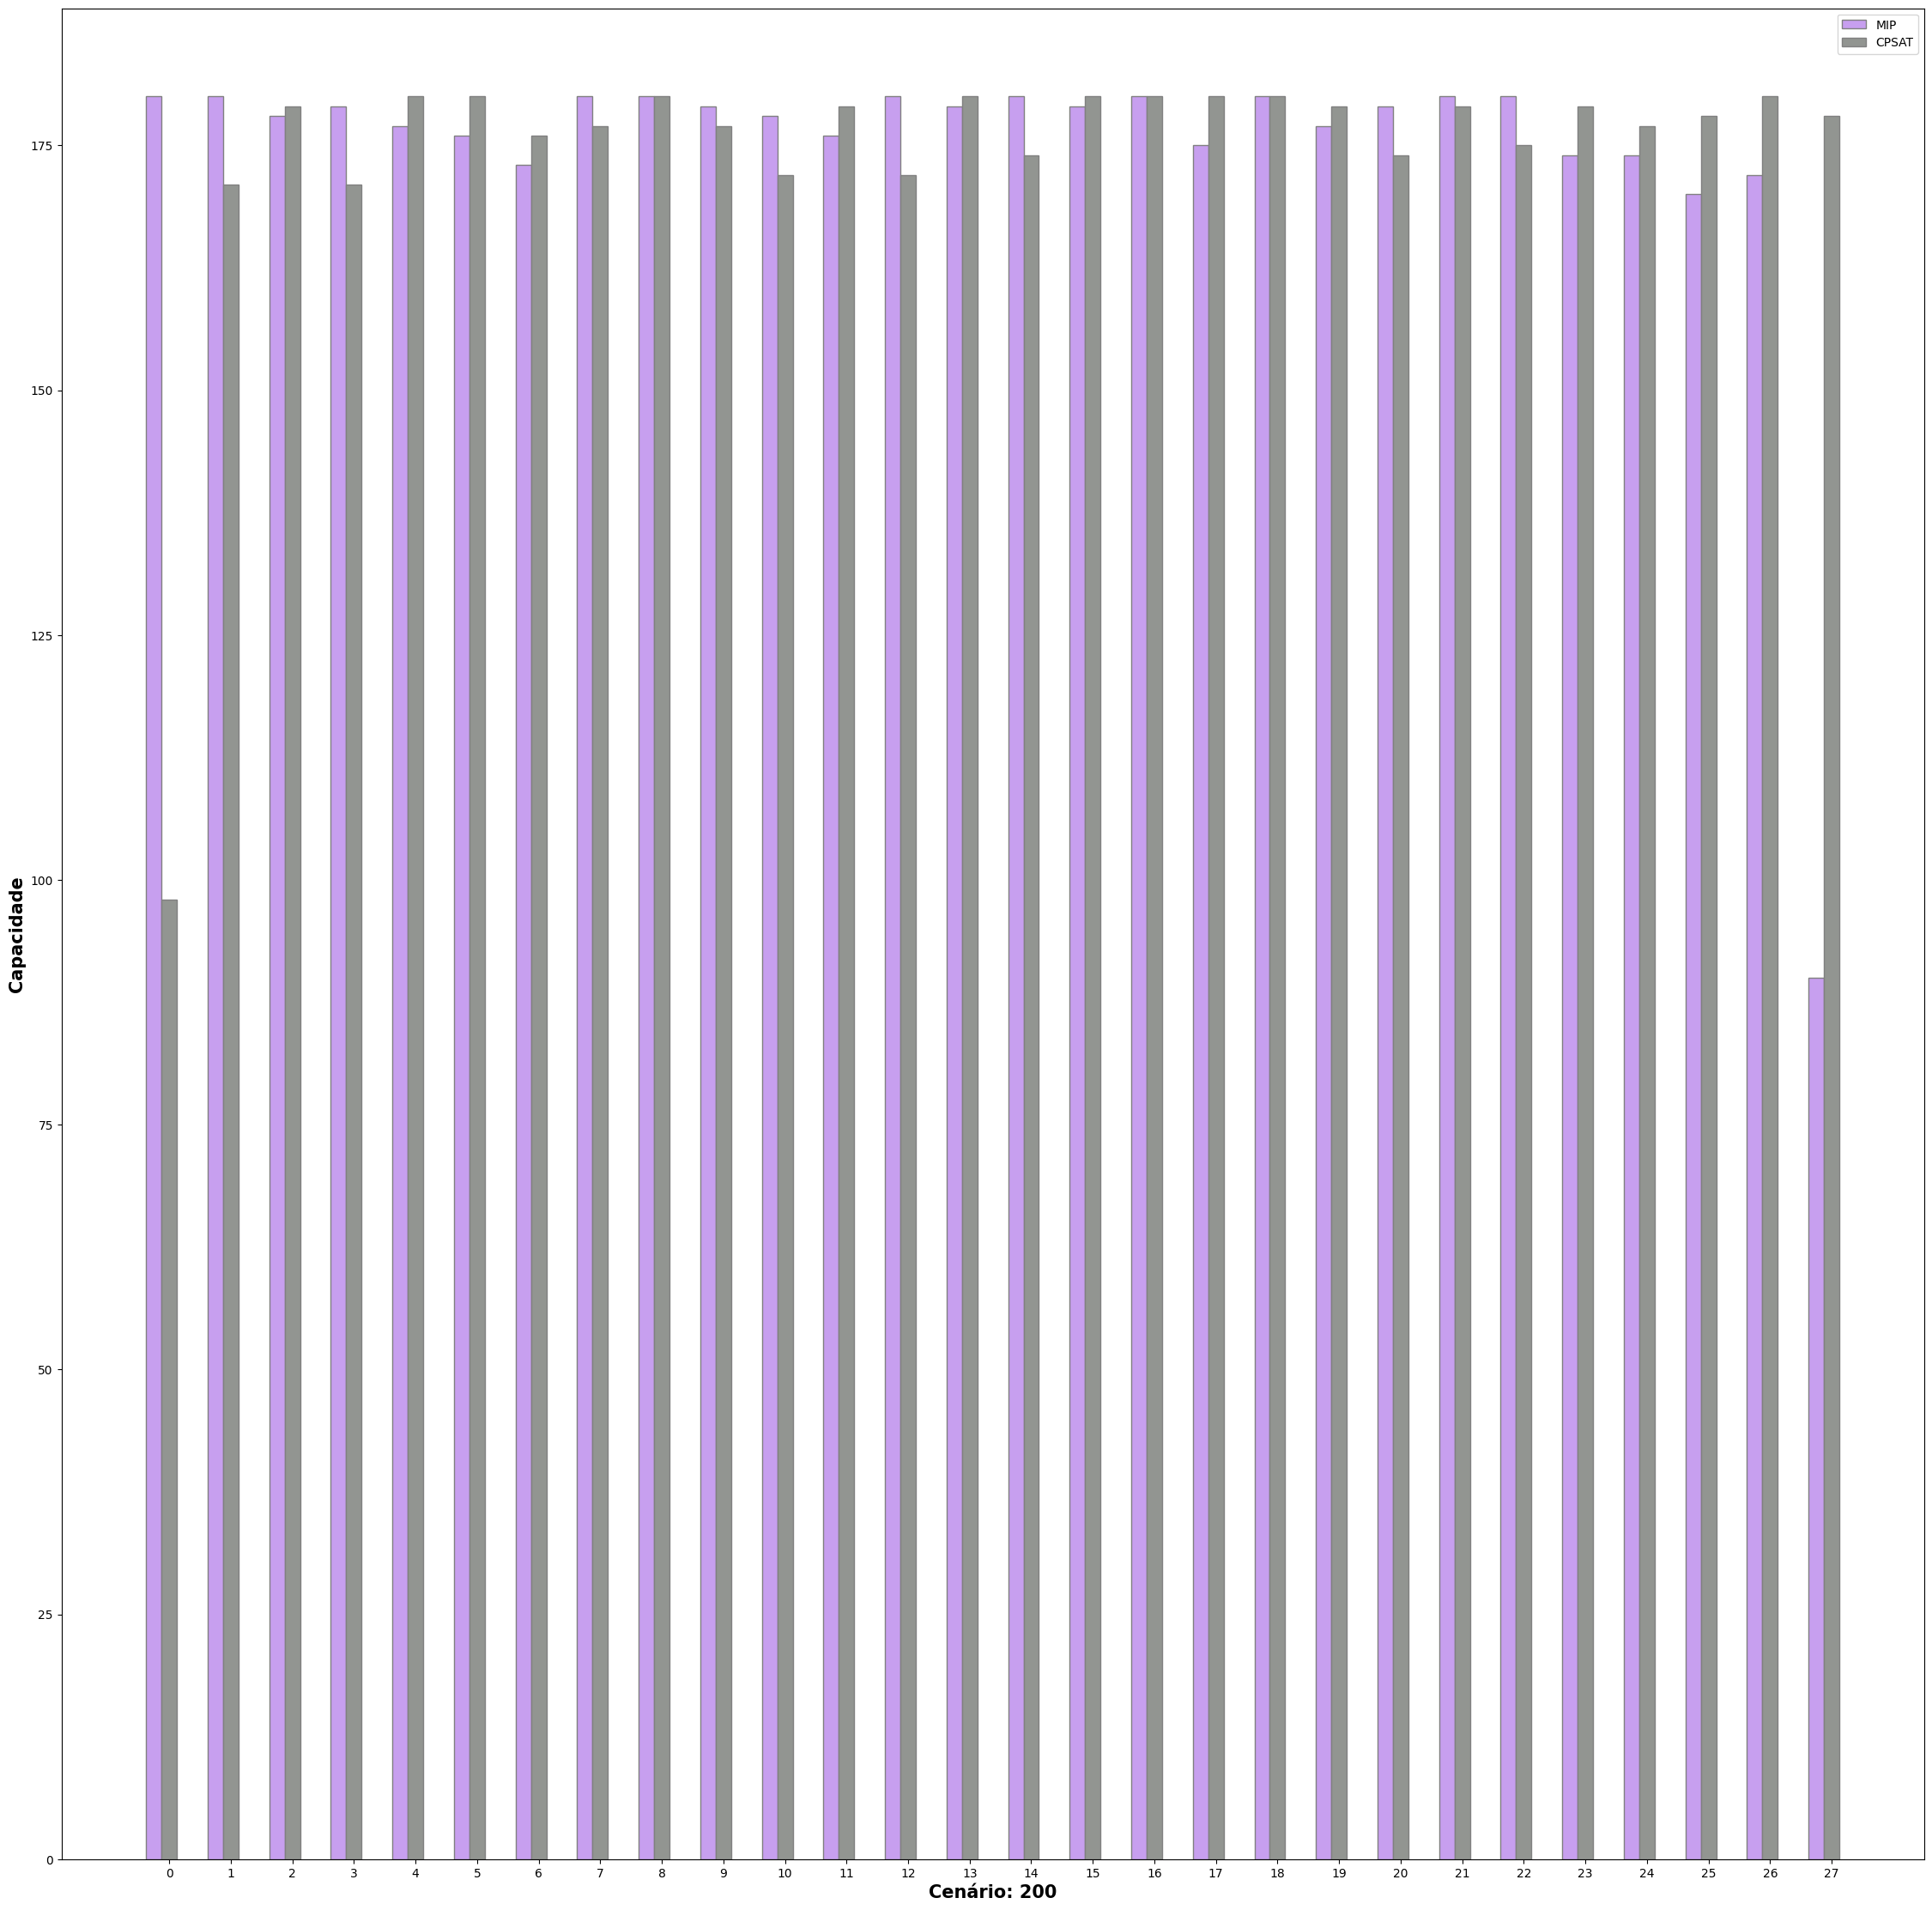

Valor MIP:  [46.0, 55.0, 62.0, 89.0, 76.0, 59.0, 74.0, 91.0, 59.0, 88.0, 45.0, 80.0, 69.0, 57.0, 164.0, 71.0, 80.0, 37.0, 96.0, 89.0, 76.0, 67.0, 76.0, 86.0, 37.0, 111.0, 55.0, 92.0, 63.0, 75.0, 75.0, 69.0, 42.0, 60.0, 78.0, 84.0, 60.0, 38.0, 85.0, 57.0]
Valor CPSAT:  [45.0, 90.0, 76.0, 64.0, 62.0, 72.0, 88.0, 68.0, 77.0, 83.0, 64.0, 57.0, 79.0, 58.0, 60.0, 44.0, 75.0, 61.0, 68.0, 88.0, 79.0, 58.0, 49.0, 64.0, 120.0, 59.0, 81.0, 59.0, 69.0, 78.0, 52.0, 57.0, 79.0, 92.0, 80.0, 73.0, 72.0, 77.0, 109.0, 87.0]


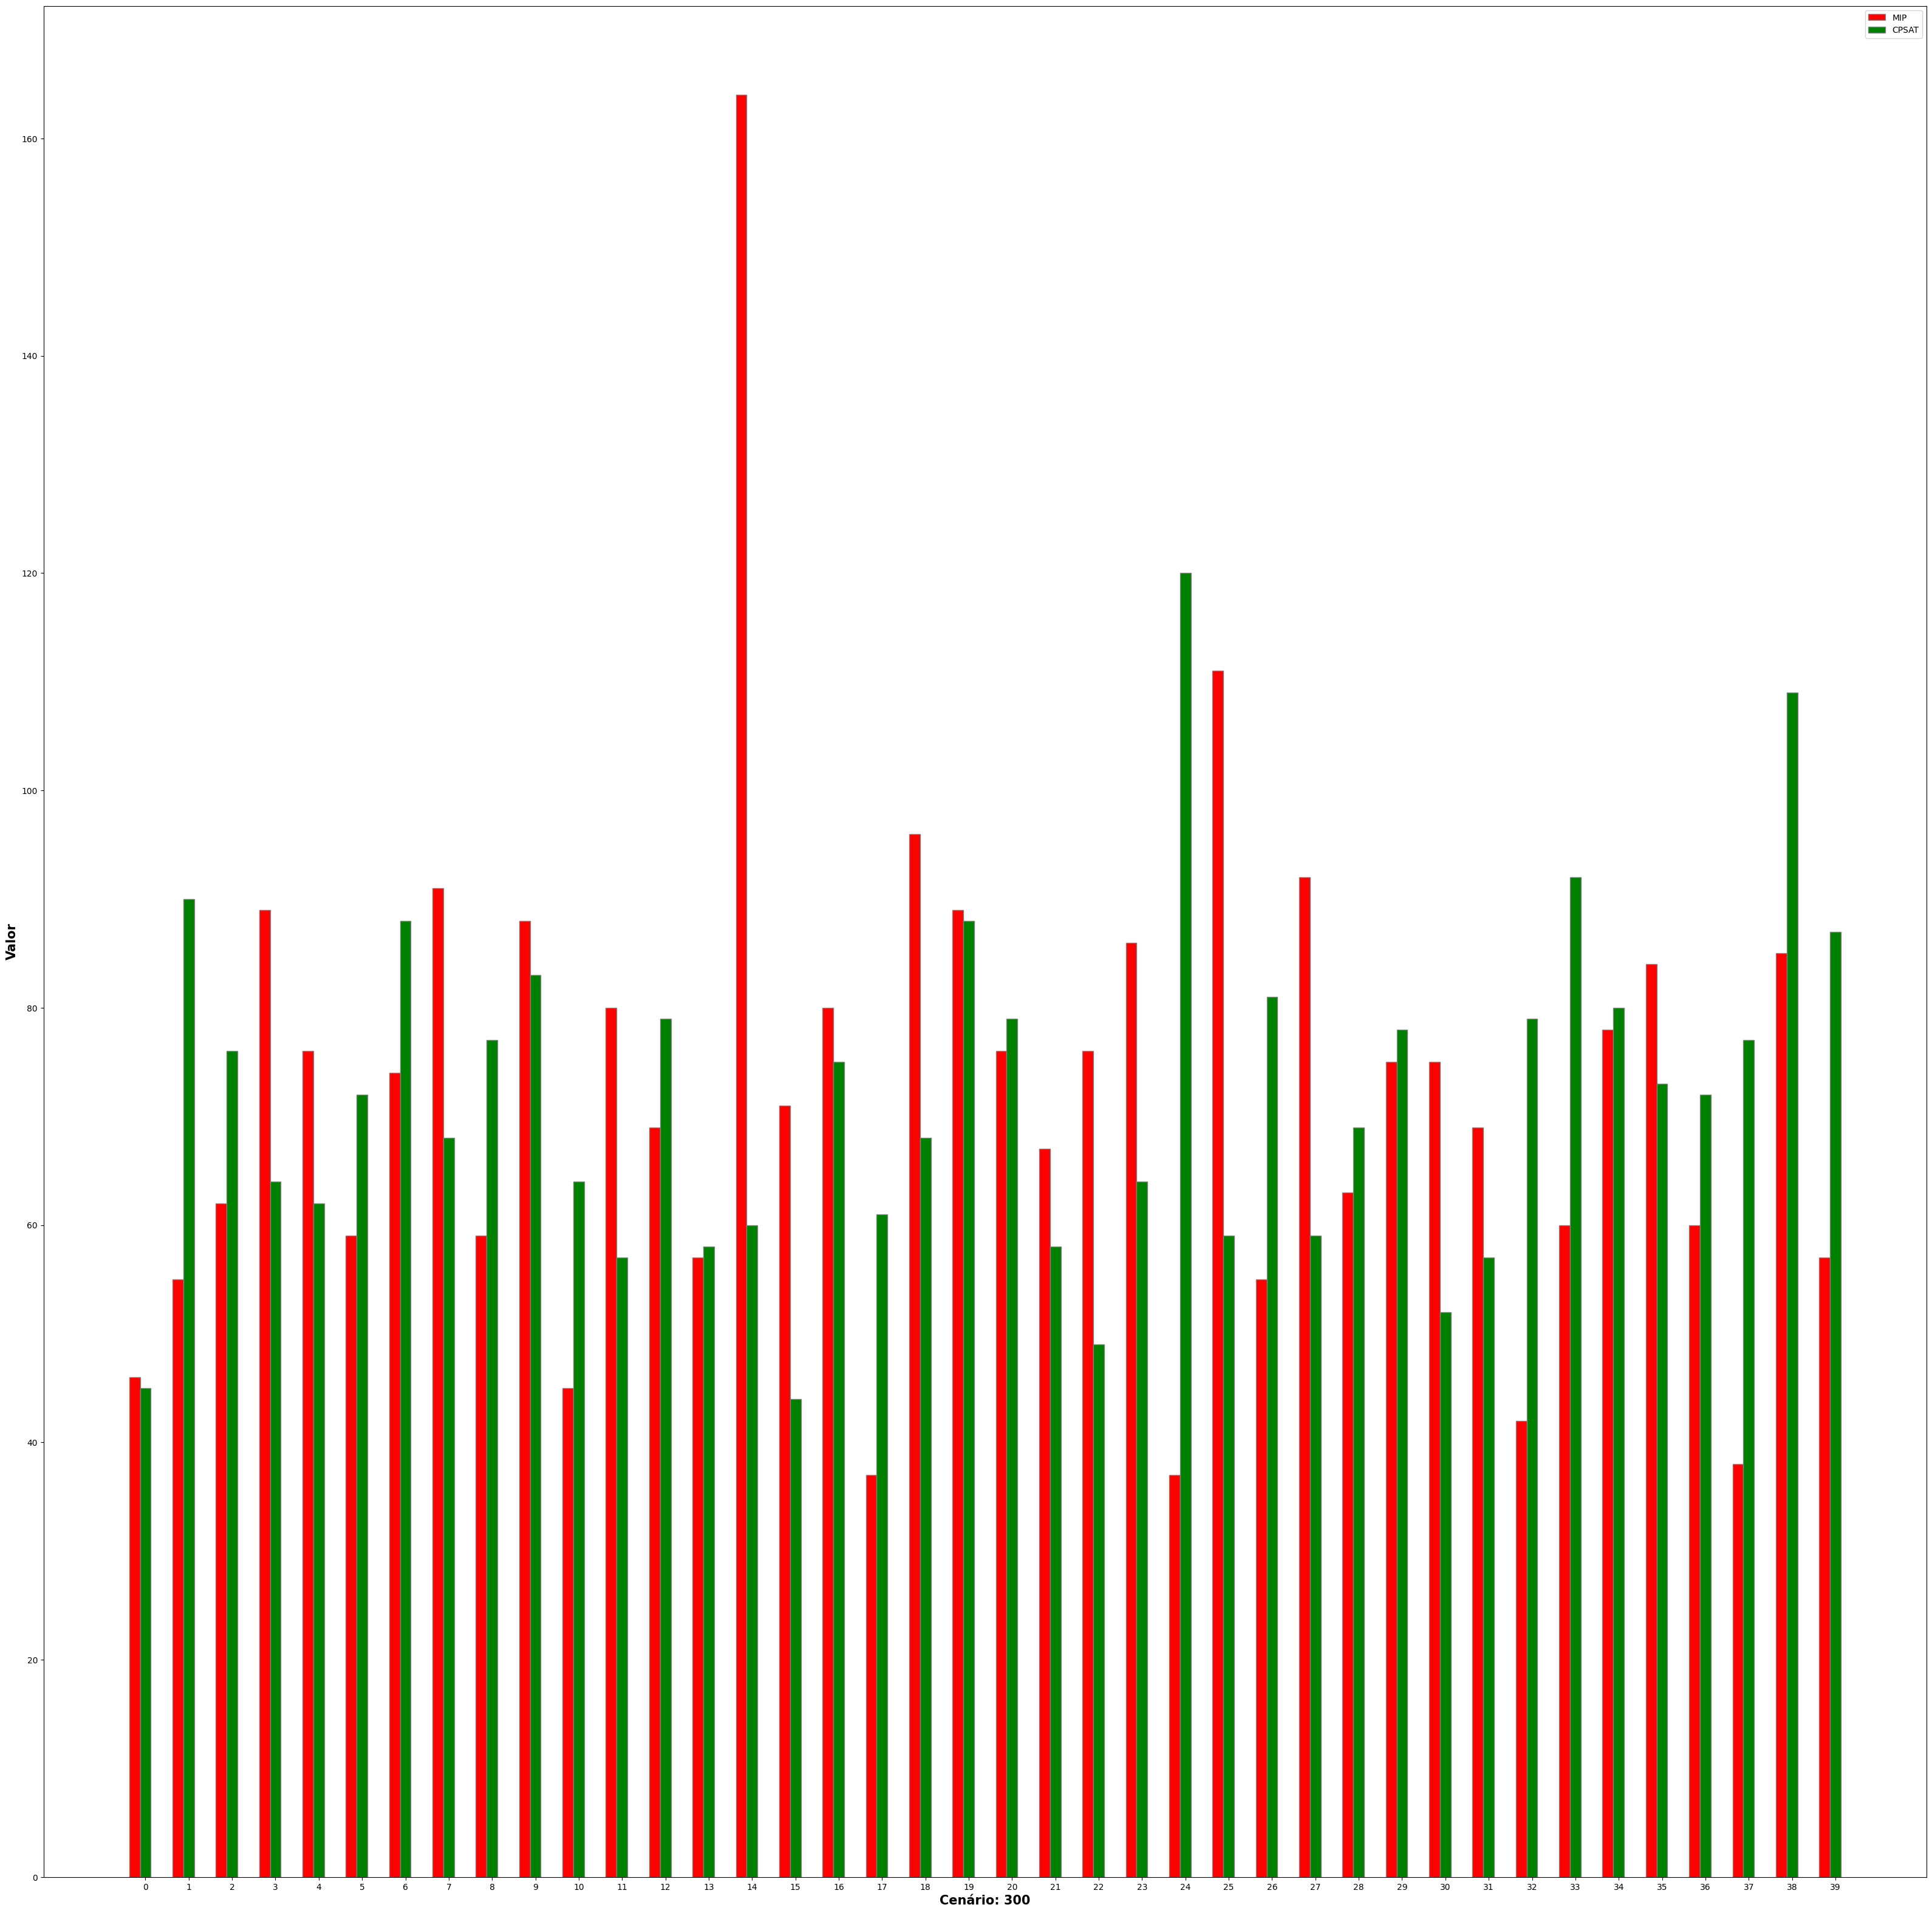

Capacidade MIP:  [177.0, 179.0, 174.0, 180.0, 180.0, 176.0, 178.0, 180.0, 176.0, 178.0, 178.0, 179.0, 179.0, 179.0, 180.0, 180.0, 180.0, 175.0, 180.0, 179.0, 180.0, 180.0, 179.0, 179.0, 179.0, 177.0, 180.0, 180.0, 178.0, 180.0, 176.0, 179.0, 174.0, 177.0, 179.0, 175.0, 173.0, 172.0, 179.0, 178.0]
Capacidade CPSAT:  [177.0, 179.0, 174.0, 179.0, 180.0, 173.0, 179.0, 180.0, 178.0, 179.0, 180.0, 180.0, 180.0, 179.0, 176.0, 180.0, 178.0, 178.0, 177.0, 180.0, 179.0, 170.0, 174.0, 178.0, 179.0, 177.0, 179.0, 178.0, 180.0, 180.0, 177.0, 174.0, 177.0, 179.0, 177.0, 179.0, 180.0, 178.0, 180.0, 180.0]


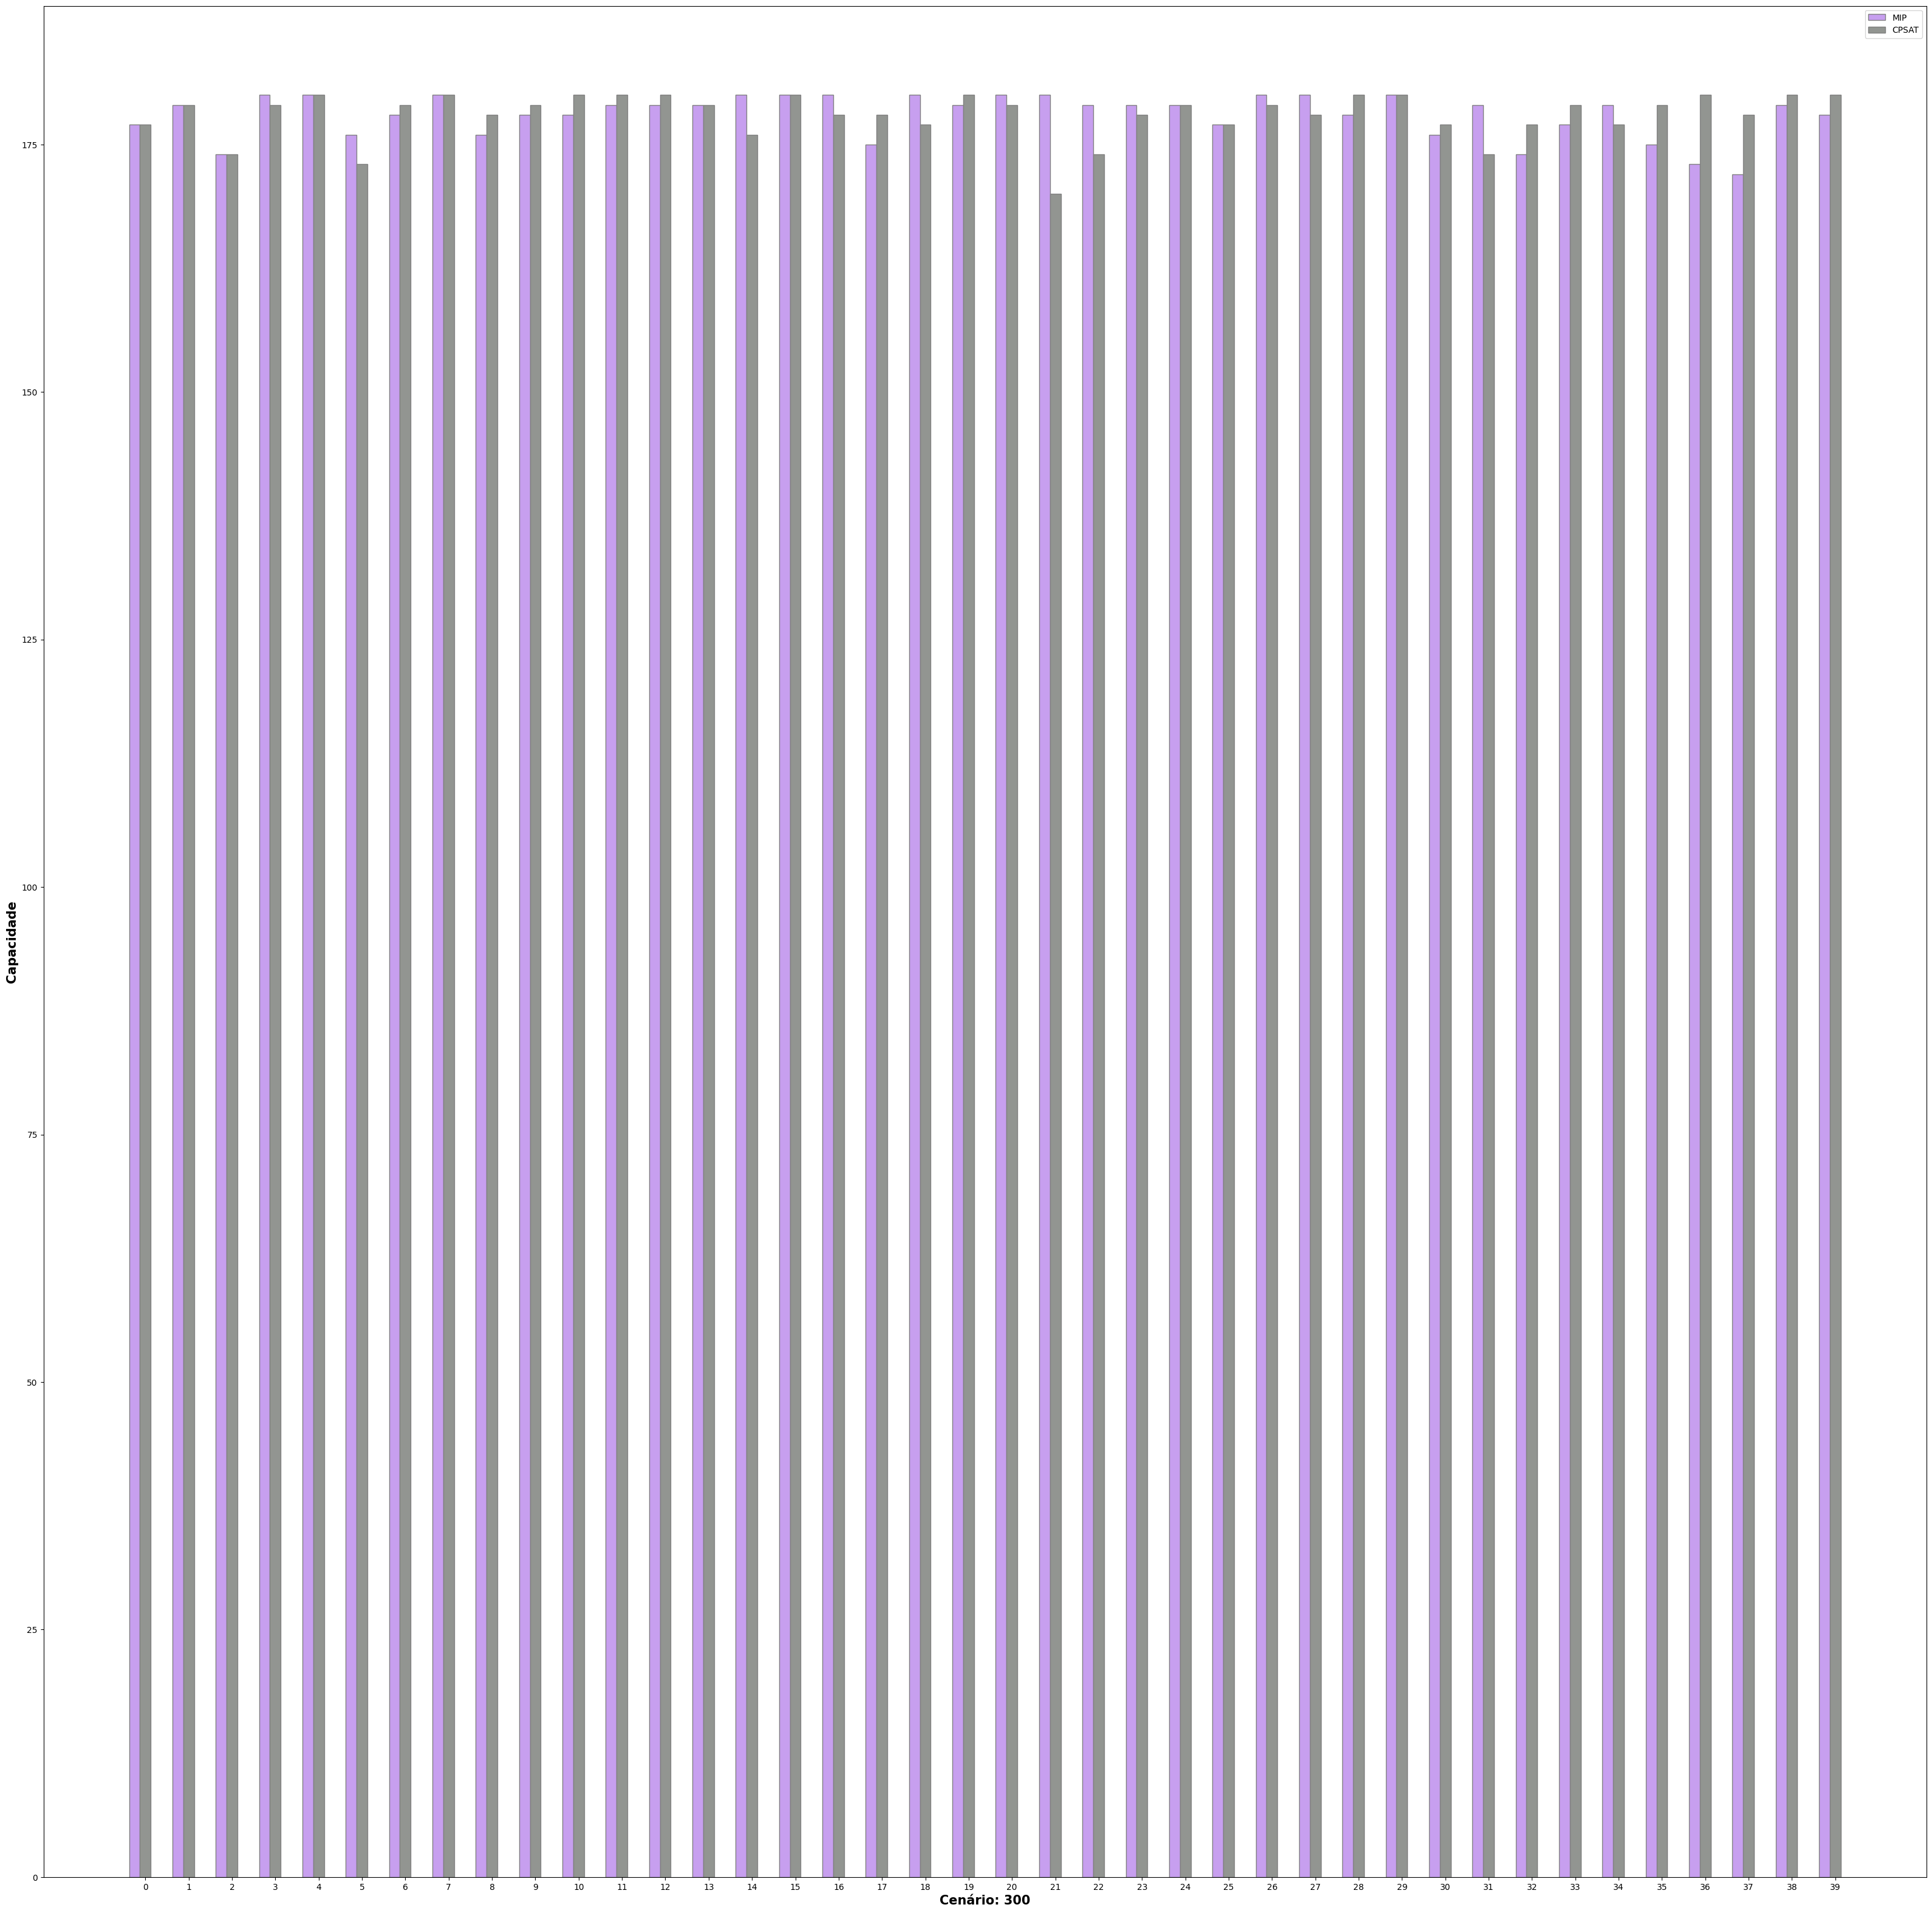

Valor MIP:  [61.0, 73.0, 87.0, 93.0, 65.0, 64.0, 64.0, 45.0, 59.0, 36.0, 74.0, 65.0, 67.0, 64.0, 132.0, 79.0, 90.0, 48.0, 64.0, 47.0, 61.0, 43.0, 63.0, 64.0, 76.0, 72.0, 71.0, 91.0, 77.0, 56.0, 62.0, 72.0, 58.0, 53.0, 74.0, 61.0, 67.0, 66.0, 64.0, 89.0, 88.0, 60.0, 104.0, 47.0, 69.0, 60.0, 71.0, 46.0, 38.0, 67.0, 108.0, 72.0, 49.0, 79.0, 72.0]
Valor CPSAT:  [73.0, 43.0, 71.0, 87.0, 67.0, 44.0, 89.0, 36.0, 81.0, 43.0, 54.0, 48.0, 84.0, 63.0, 94.0, 66.0, 61.0, 54.0, 83.0, 75.0, 58.0, 52.0, 91.0, 68.0, 68.0, 83.0, 40.0, 58.0, 72.0, 74.0, 57.0, 97.0, 94.0, 77.0, 57.0, 70.0, 45.0, 47.0, 63.0, 67.0, 45.0, 62.0, 73.0, 92.0, 78.0, 70.0, 67.0, 92.0, 103.0, 77.0, 59.0, 49.0, 80.0, 79.0, 67.0]


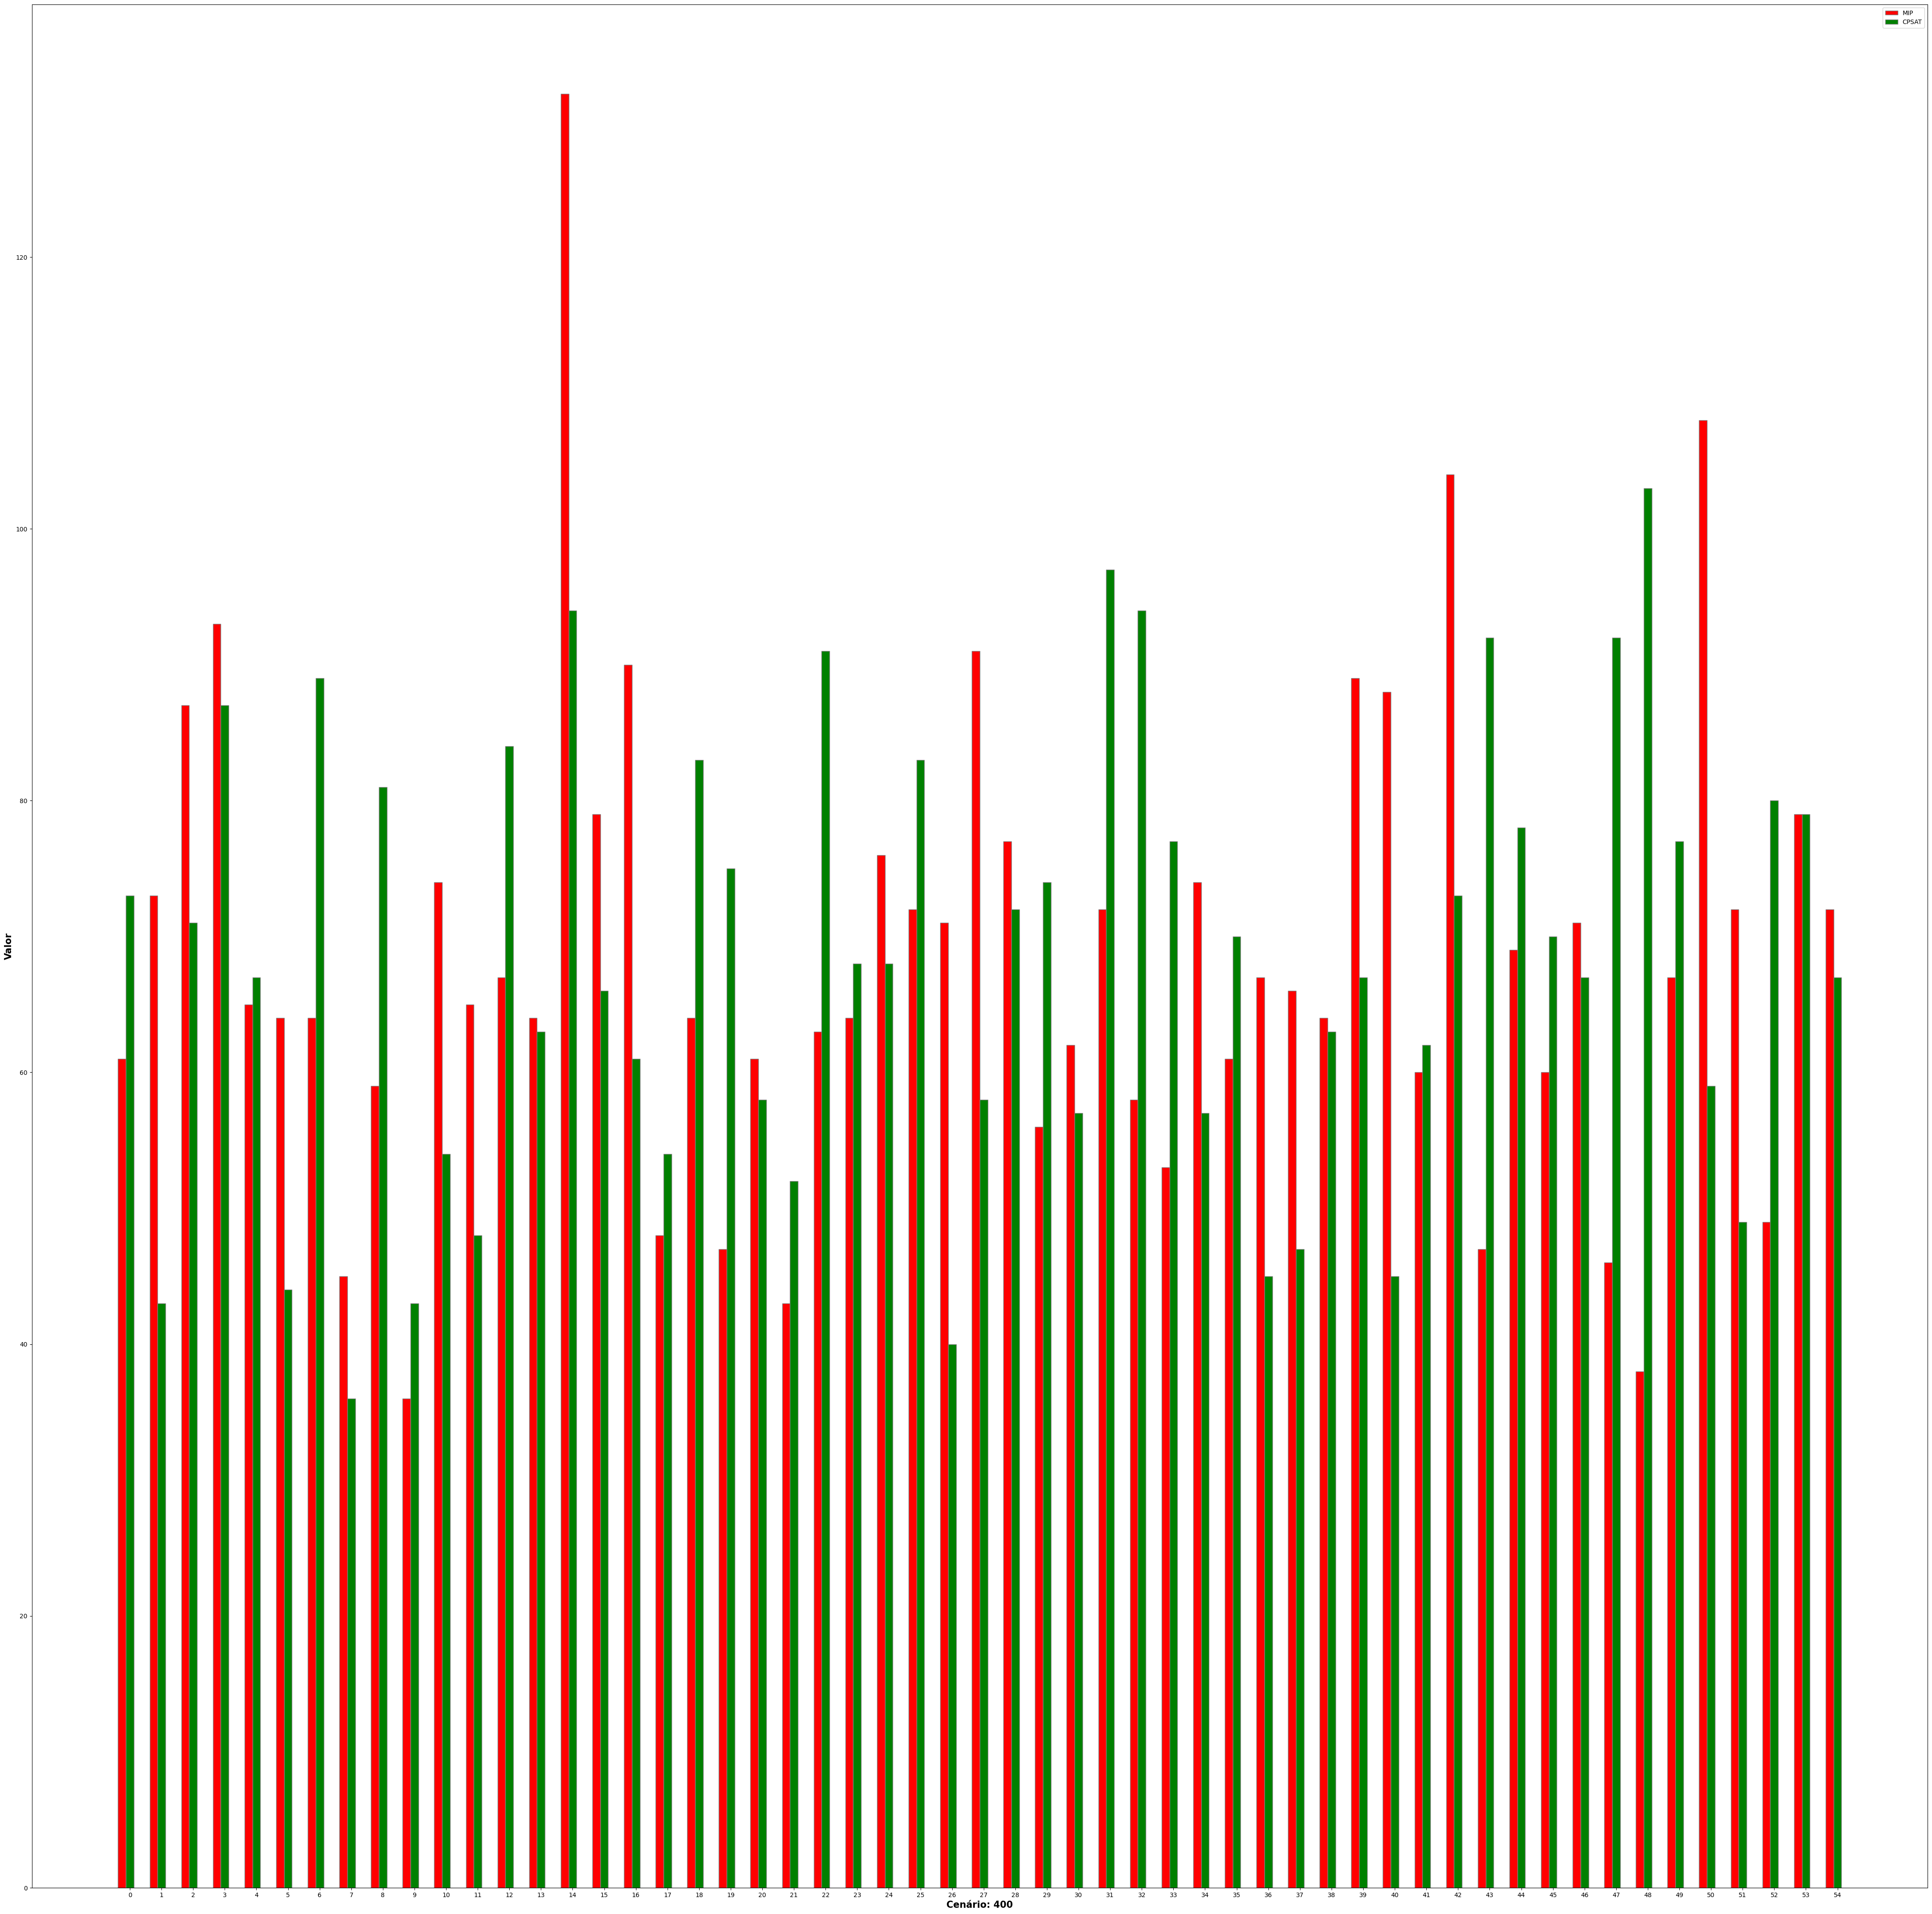

Capacidade MIP:  [177.0, 180.0, 173.0, 179.0, 178.0, 174.0, 179.0, 171.0, 178.0, 177.0, 176.0, 180.0, 180.0, 180.0, 173.0, 175.0, 177.0, 177.0, 175.0, 177.0, 179.0, 176.0, 180.0, 180.0, 177.0, 180.0, 179.0, 179.0, 174.0, 176.0, 175.0, 179.0, 180.0, 175.0, 180.0, 174.0, 178.0, 177.0, 179.0, 178.0, 177.0, 179.0, 177.0, 176.0, 178.0, 178.0, 174.0, 176.0, 180.0, 177.0, 176.0, 174.0, 175.0, 173.0, 178.0]
Capacidade CPSAT:  [152.0, 178.0, 179.0, 178.0, 180.0, 180.0, 178.0, 172.0, 180.0, 172.0, 174.0, 179.0, 176.0, 175.0, 178.0, 179.0, 173.0, 179.0, 180.0, 179.0, 177.0, 179.0, 173.0, 179.0, 179.0, 174.0, 180.0, 174.0, 178.0, 179.0, 176.0, 180.0, 179.0, 174.0, 173.0, 179.0, 180.0, 180.0, 176.0, 179.0, 174.0, 176.0, 180.0, 180.0, 179.0, 176.0, 176.0, 178.0, 176.0, 180.0, 180.0, 179.0, 176.0, 180.0, 180.0]


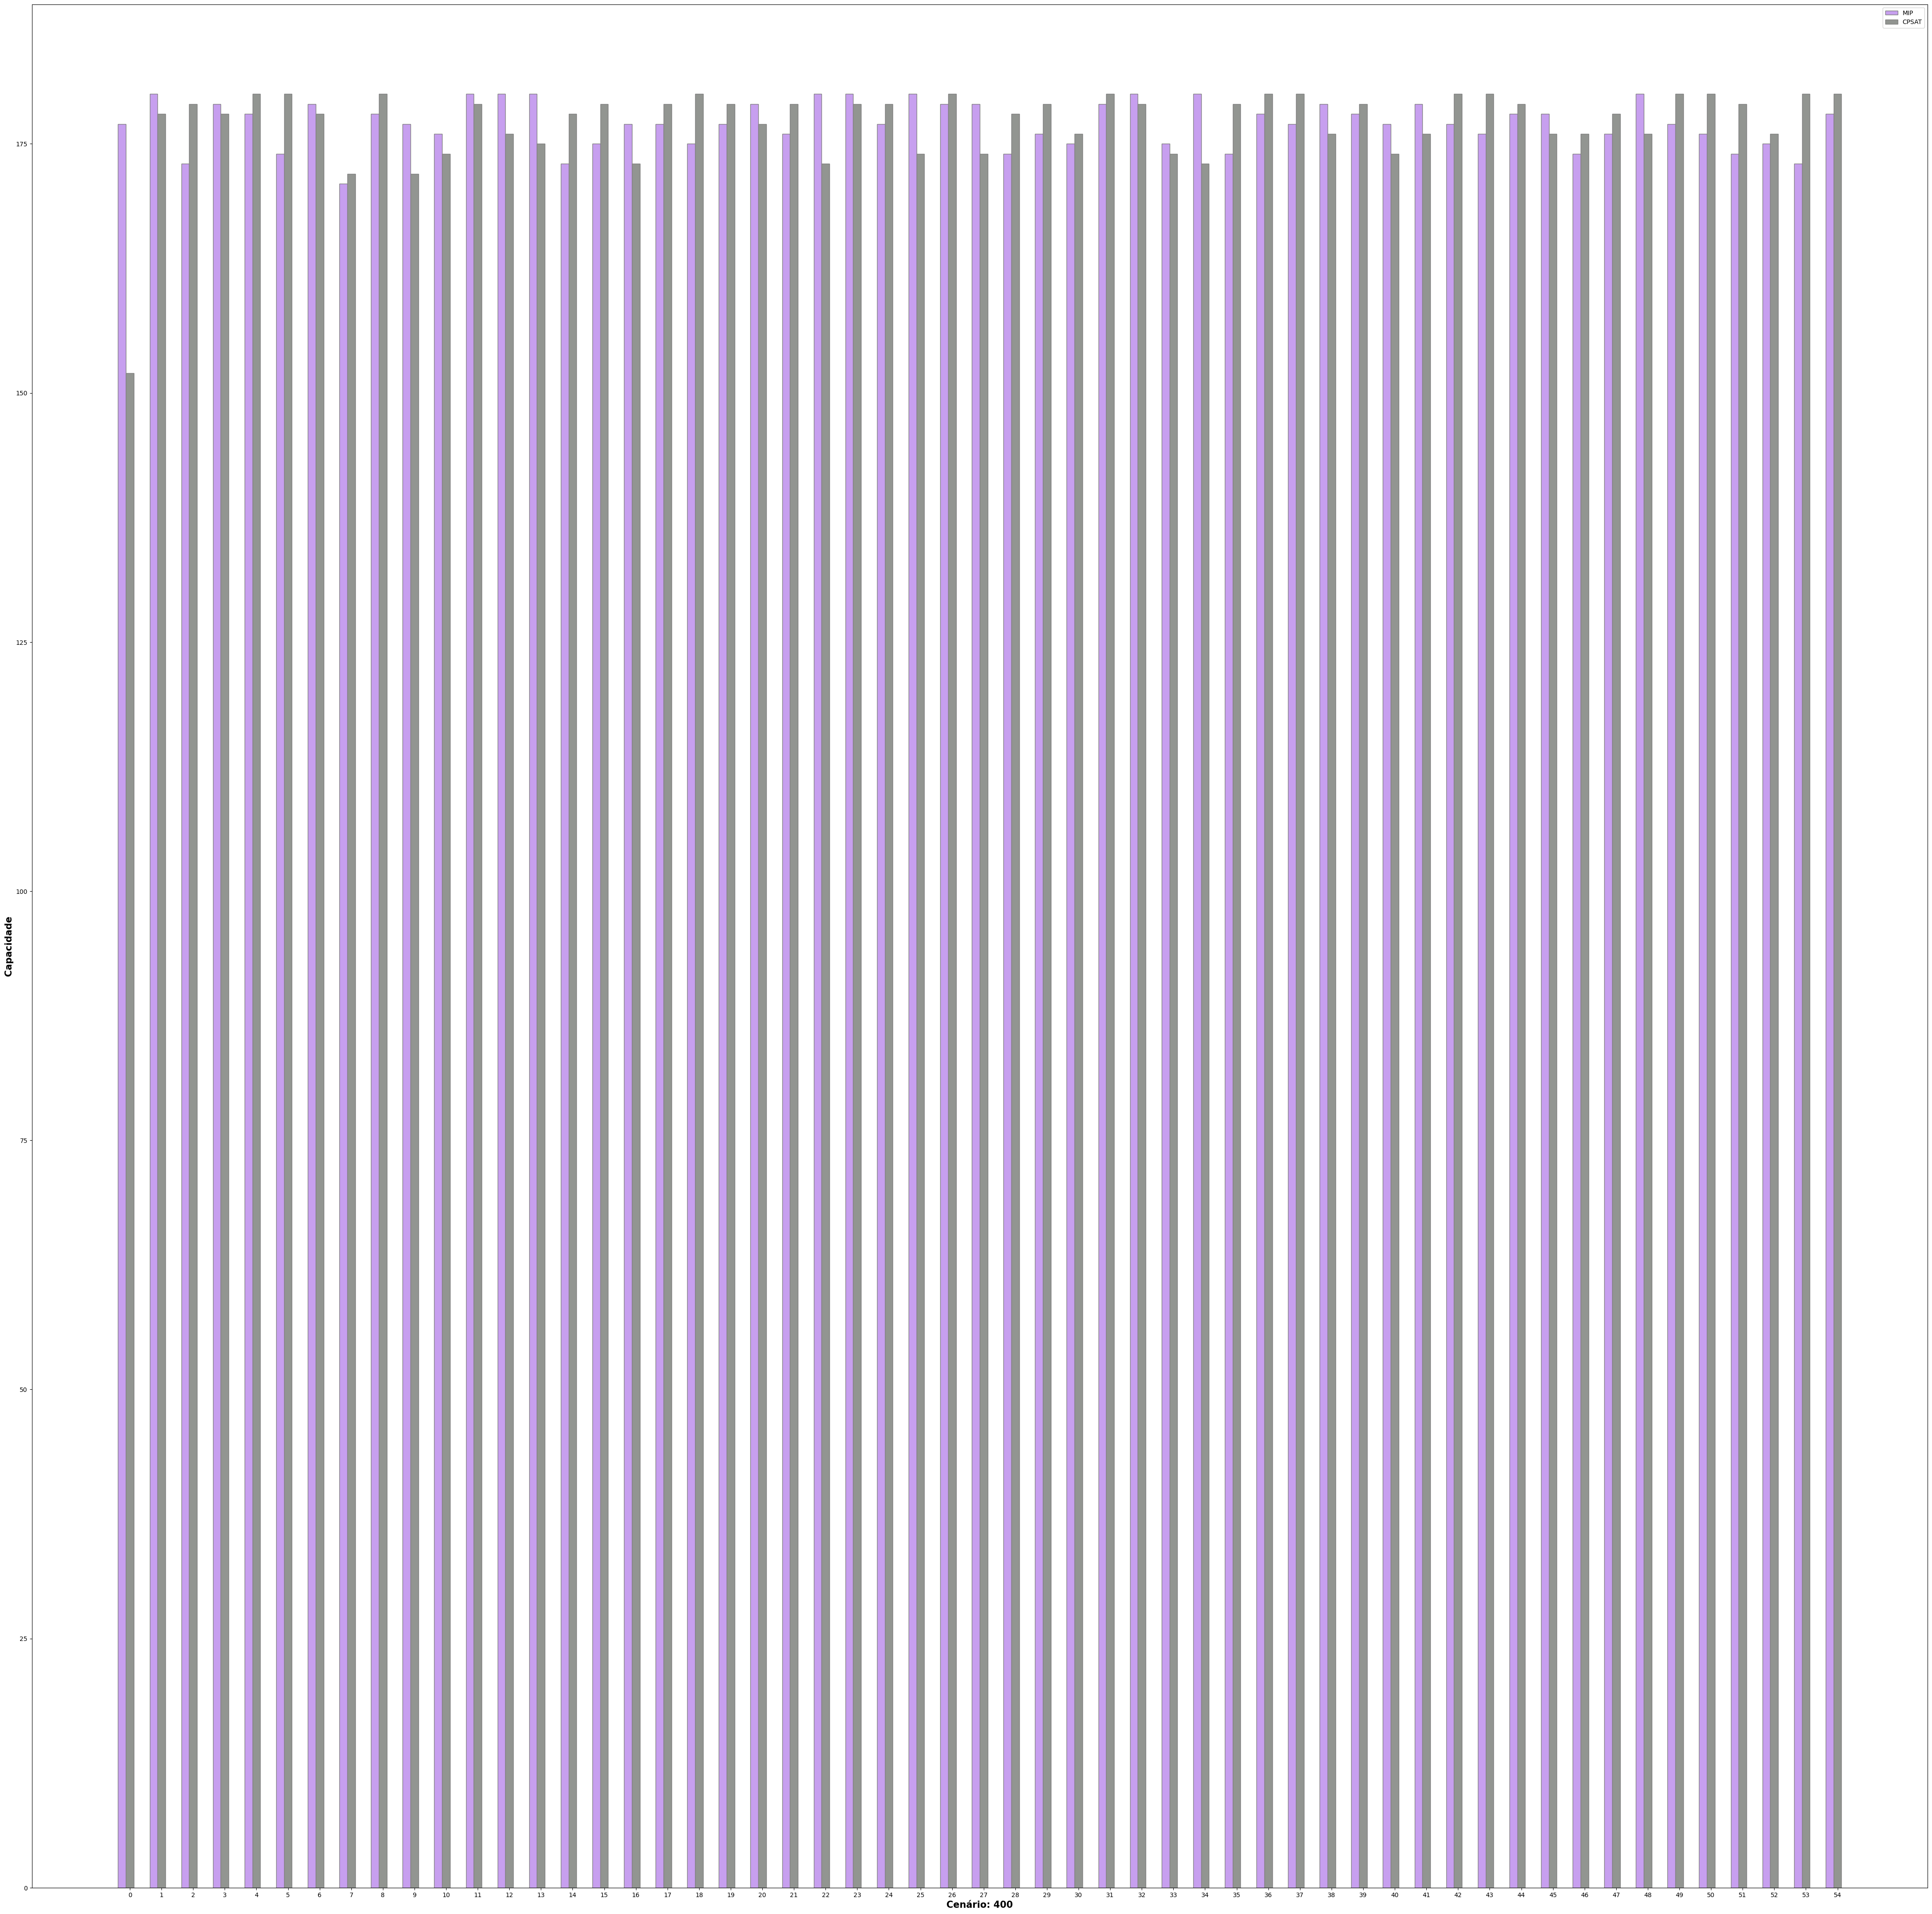

In [34]:
#lista os cenários
cenarios = sprint_por_cenario.keys()
list_cenarios = [int(x) for x in cenarios]
list_cenarios.sort()
print(list_cenarios)

for cenario in list_cenarios:

    barra_mip = []
    barra_capacidade_mip = []
    barra_cpsat = []
    barra_capacidade_cpsat = []

    # set width of bars
    barWidth = 0.25

    # lista com os nomes dos sprints
    list_nome_sprint = []

    for chaves in sprint_por_cenario[str(cenario)]['MIP']:
        for x in chaves.keys():
            list_nome_sprint.append(x)

    # list_nome_sprint.sort()
    #print(list_nome_sprint)

    # print('A: ', sprint_por_cenario['10'])
    # print('B: ', sprint_por_cenario['10']['MIP'])
    for i in range(len(list_nome_sprint)):
        sprint_mip = sprint_por_cenario[str(cenario)]['MIP'][i]
        valor_mip = sprint_mip[list_nome_sprint[i]]['valor']
        barra_mip.append(valor_mip)

        peso_mip = sprint_mip[list_nome_sprint[i]]['capacidade']
        barra_capacidade_mip.append(peso_mip)

        sprint_cpsat = sprint_por_cenario[str(cenario)]['CPSAT'][i]
        valor_cpsat = sprint_cpsat[list_nome_sprint[i]]['valor']
        barra_cpsat.append(valor_cpsat)

        peso_cpsat = sprint_cpsat[list_nome_sprint[i]]['capacidade']
        barra_capacidade_cpsat.append(peso_cpsat)

    # Set position of bar on X axis
    br1 = np.arange(len(barra_mip))
    br2 = [x + barWidth for x in br1]

    #plt.figure(figsize=(len(list_nome_sprint), len(list_nome_sprint) ))

    # # Make the plot
    plt.bar(br1, barra_mip, color='r', width=barWidth, edgecolor='grey', label='MIP')
    plt.bar(br2, barra_cpsat, color='g', width=barWidth, edgecolor='grey', label='CPSAT')

    # # Adding Xticks
    plt.xlabel('Cenário: ' + str(cenario), fontweight='bold', fontsize=15)
    plt.ylabel('Valor', fontweight='bold', fontsize=15)

    list_nome_sprint = np.arange(len(list_nome_sprint))
    plt.xticks([r + barWidth for r in range(len(list_nome_sprint))], list_nome_sprint)

    plt.legend()
    print('Valor MIP: ', barra_mip)
    print('Valor CPSAT: ', barra_cpsat)
    plt.show()

    #---
    #plt.figure(figsize=(len(list_nome_sprint), len(list_nome_sprint) ))
    plt.bar(br1, barra_capacidade_mip, color='#c79fef', width=barWidth, edgecolor='grey', label='MIP')
    plt.bar(br2, barra_capacidade_cpsat, color='#929591', width=barWidth, edgecolor='grey', label='CPSAT')

    # # Adding Xticks
    plt.xlabel('Cenário: ' + str(cenario), fontweight='bold', fontsize=15)
    plt.ylabel('Capacidade', fontweight='bold', fontsize=15)

    list_nome_sprint = np.arange(len(list_nome_sprint))
    plt.xticks([r + barWidth for r in range(len(list_nome_sprint))], list_nome_sprint)

    print('Capacidade MIP: ', barra_capacidade_mip)
    print('Capacidade CPSAT: ', barra_capacidade_cpsat)
    
    plt.legend()
    plt.show()